In [1]:
from HARK.ConsumptionSaving.ConsPortfolioModel import PortfolioConsumerType
from HARK.ConsumptionSaving.ConsWealthPortfolioModel import WealthPortfolioConsumerType
from HARK.utilities import plot_funcs

In [2]:
cycles = 0
port_agent = PortfolioConsumerType(cycles=cycles)
wealth_agent = WealthPortfolioConsumerType(
    cycles=cycles,
    WealthShare=0.5,
    WealthShift=0.0,
)

In [3]:
port_agent.solve()
# port_agent.completed_cycles

In [4]:
wealth_agent.solve()
# wealth_agent.completed_cycles

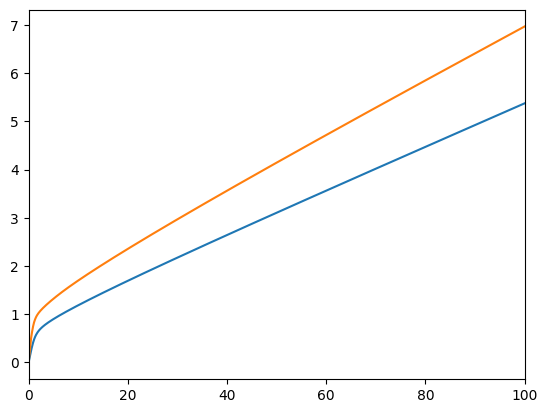

In [5]:
plot_funcs([wealth_agent.solution[0].cFuncAdj, port_agent.solution[0].cFuncAdj], 0, 100)

In [6]:
wealth_agent.solution[0].cFuncAdj.y_list

array([0.00000000e+00, 1.00000000e-03, 2.44807914e-02, 4.85083791e-02,
       7.30732362e-02, 9.81321895e-02, 1.23602493e-01, 1.49363277e-01,
       1.75261723e-01, 2.01125290e-01, 2.26775778e-01, 2.52039551e-01,
       2.76763271e-01, 3.00807644e-01, 3.24057369e-01, 3.46443760e-01,
       3.67916642e-01, 3.88434230e-01, 4.07979586e-01, 4.26601011e-01,
       4.44311096e-01, 4.61127057e-01, 4.77083706e-01, 4.92242044e-01,
       5.06661090e-01, 5.20350847e-01, 5.33414202e-01, 5.45855506e-01,
       5.57758614e-01, 5.69109676e-01, 5.79966524e-01, 5.90429142e-01,
       6.00495364e-01, 6.10200366e-01, 6.19553397e-01, 6.28605445e-01,
       6.37386844e-01, 6.45926628e-01, 6.54248827e-01, 6.62366821e-01,
       6.70290933e-01, 6.78093443e-01, 6.85752725e-01, 6.93279645e-01,
       7.00683360e-01, 7.08013054e-01, 7.15278374e-01, 7.22450563e-01,
       7.29556360e-01, 7.36670768e-01, 7.43713015e-01, 7.50736364e-01,
       7.57776399e-01, 7.64759112e-01, 7.71800124e-01, 7.78810849e-01,
      

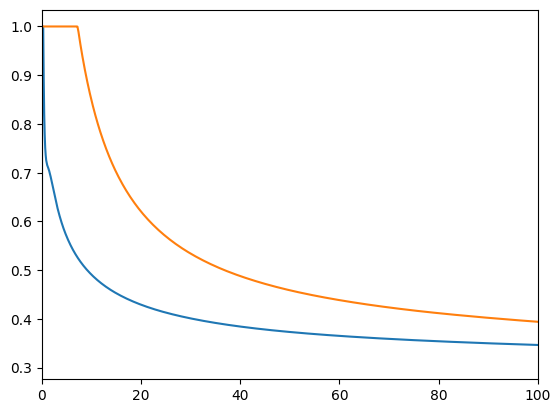

In [7]:
plot_funcs(
    [wealth_agent.solution[0].ShareFuncAdj, port_agent.solution[0].ShareFuncAdj],
    0,
    100,
)

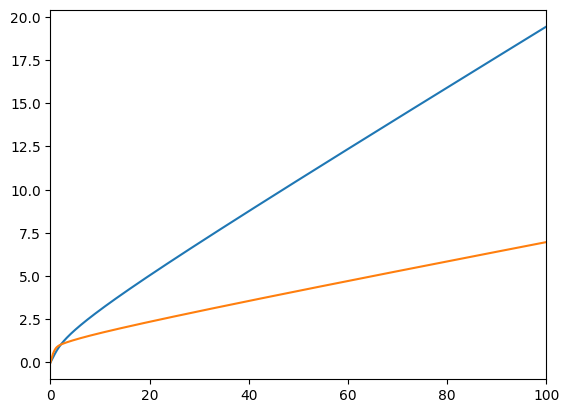

In [8]:
plot_funcs(
    [wealth_agent.solution[0].vPfuncAdj.cFunc, port_agent.solution[0].vPfuncAdj.cFunc],
    0,
    100,
)